# DOG BREED CLASSIFIER




### Project Overview:

The Dog breed classification problem is a well-known problem in Machine Learning. We can find it on Kaggle https://www.kaggle.com/c/dog-breed-identification/overview/description. The problem here is to identify the breed of dog if dog image is given as an input, and suppose if we gave an image of a humans as an input to the classifier, we have to identify the resembling dog breed to that human. The idea is to build a pipeline that can process real world user supplied images and identify an estimate of the canine’s breed. This is a multi-class classification problem where we can use supervised machine learning to solve this problem.

<hr/>

### Problem Statement:

The main aim of the project is to build a machine learning model that can be used within web app to process real-world, user-supplied images. The model has to perform two tasks:
* **Dog face detection**: Suppose if we gave any dog image as an input to the model, then that model will predict the canine’s breed.
* **Human face detection**: Suppose if we gave any dog image as an input to the model, then that model will predict the resembling dog breed.

<hr/>

**Dog face detection**          |   **Human face detection**
:-------------------------:|:-------------------------:
![](images/c1.png)  |  ![](images/c2.png)


In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dogImages`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("lfw/*/*"))
dog_files = np.array(glob("dogImages/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


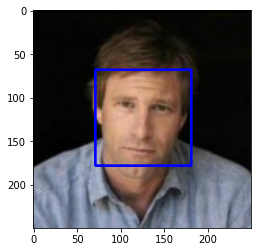

In [2]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [3]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)


Human faces correctly classified: 96%

Dog faces mistakenly classified as human faces: 18%

In [4]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
human_count = 0
dog_count = 0

for img in human_files_short:
    if face_detector(img) == True:
        human_count +=1
        
for img in dog_files_short:
    if face_detector(img) == True:
        dog_count +=1

print ("Correctly Detected Human Faces: ", human_count)
print ("Images wrongly classified as human faces: ", dog_count)

Correctly Detected Human Faces:  96
Images wrongly classified as human faces:  18


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [5]:
### (Optional) 
### TODO: Test performance of another face detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [6]:
import torch
import torchvision.models as models
from torchvision.models.vgg import model_urls

model_urls['vgg16'] = model_urls['vgg16'].replace('https://', 'http://')


# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

###  Making Predictions with a Pre-trained Model

In the next code cell, I wrote a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [7]:
from PIL import Image
import torchvision.transforms as transforms

# Set PIL to be tolerant of image files that are truncated.
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    

    ## Load and pre-process an image from the given img_path
   
    
    image = Image.open(img_path).convert('RGB')
    normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])
    transformations = transforms.Compose([transforms.Resize(size=(224, 224)),
                                         transforms.ToTensor(),
                                         normalize])
    transformed_image = transformations(image)[:3,:,:].unsqueeze(0) 
    if use_cuda:
        transformed_image = transformed_image.cuda()
        
    output = VGG16(transformed_image)
     ## Return the *index* of the predicted class for that image
    return torch.max(output,1)[1].item() # predicted class index
    
   

### Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [8]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    index_predicted = VGG16_predict(img_path)
    result = index_predicted >=151 and index_predicted <=268
    
    return result # true/false

### Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 

In dog_files_short, 95% dog faces are correctly detected.

In human_files_short, 0% of images is misclassified.

In [9]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.

dog_detector_dogs = 0
dog_detector_humans = 0

for image in human_files_short:
    if dog_detector(image) == True:
        dog_detector_humans +=1     
        
for image in dog_files_short:
    if dog_detector(image) == True:
        dog_detector_dogs +=1

print ("Correctly Detected Dog Faces: ", dog_detector_dogs)
print ("Images wrongly classified in human faces: ", dog_detector_humans)

Correctly Detected Dog Faces:  95
Images wrongly classified in human faces:  0


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  


### Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [10]:
import os
from torchvision import datasets

### Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

batch_size = 20
num_workers = 0

data_dir = 'DATA/dogImages/'

train_path = data_dir + 'train'
val_path = data_dir + 'valid'
test_path = data_dir + 'test'

normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])

train_dataset = datasets.ImageFolder(train_path,  transforms.Compose([
            transforms.RandomResizedCrop(224),
            transforms.RandomHorizontalFlip(),
            transforms.RandomRotation(15),
            transforms.ToTensor(),
            normalize,
        ]))

val_dataset = datasets.ImageFolder(val_path,  transforms.Compose([
            transforms.Resize(size=(224,224)),
            transforms.ToTensor(),
            normalize,
        ]))

test_dataset = datasets.ImageFolder(test_path,  transforms.Compose([
             transforms.Resize(size=(224,224)),
            transforms.ToTensor(),
            normalize,
        ]))

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size= batch_size, num_workers = num_workers, shuffle = True)

val_loader = torch.utils.data.DataLoader(val_dataset, batch_size= batch_size, num_workers = num_workers)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size= batch_size, num_workers = num_workers)

loaders_scratch = {
    'train': train_loader,
    'valid': val_loader,
    'test': test_loader
}

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:
* Most of the Pre trained models like VGG16 takes the size (224,224) as input, so I have used this size.
* For train data, I have done image augmentation to avoid overfitting the model.
* Transforms used: Random resize crop to 224, random flipping and random rotation.
* For validation and test data, I have done only image resizing.
* I have applied normalization to all three datasets.

### Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [11]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        self.conv1 = nn.Conv2d(3, 36, 3, padding=1)
        self.conv2 = nn.Conv2d(36, 64, 3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)     
        self.pool = nn.MaxPool2d(2, 2)   
        self.fc1 = nn.Linear(28*28*128, 512)
        self.fc2 = nn.Linear(512, 133) 
        self.dropout = nn.Dropout(0.25) 
        self.batch_norm = nn.BatchNorm1d(512)
    
    def forward(self, x):
        ## Define forward behavior
        x = self.pool(F.relu(self.conv1(x)))               
        x = self.pool(F.relu(self.conv2(x)))                      
        x = self.pool(F.relu(self.conv3(x)))                
                      
        x = x.view(-1, 28*28*128)
        
        x = F.relu(self.batch_norm(self.fc1(x)))        
        x = self.dropout(x)        
        x = F.relu(self.fc2(x))
               
        return x
        

#-#-# You do NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()
print(model_scratch)
# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

Net(
  (conv1): Conv2d(3, 36, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(36, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=100352, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=133, bias=True)
  (dropout): Dropout(p=0.25, inplace=False)
  (batch_norm): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 

* The model contains 3 convolutional layers.In that model all convolutional layers have the  kernal size of 3 and stride of 1. The first conv layer (conv1) have in_channels =3 and the final conv layer (conv3) produces an output size of 128.

* I have used the ReLU activation function. The pooling layer of (2,2) is used which will reduce the input size by 2 after every pooling layer. We have two fully connected layers that finally produces 133 dimensional output.I have also added a dropout of 0.25  to avoid overfitting.

 

###  Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [12]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=0.01)

###  Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [13]:
# the following import is required for training to be robust to truncated images
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            output = model(data)
            loss = criterion(output, target)
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))

            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss < valid_loss_min:
            
            print('Validation loss decreased ({:.6f} --> {:.6f}). Saving the model'.format(valid_loss_min, valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss   
            
    # return trained model
    return model


# train the model
model_scratch = train(100, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

Epoch: 1 	Training Loss: 4.812072 	Validation Loss: 4.703097
Validation loss decreased (inf --> 4.703097). Saving the model
Epoch: 2 	Training Loss: 4.651747 	Validation Loss: 4.559783
Validation loss decreased (4.703097 --> 4.559783). Saving the model
Epoch: 3 	Training Loss: 4.556679 	Validation Loss: 4.520639
Validation loss decreased (4.559783 --> 4.520639). Saving the model
Epoch: 4 	Training Loss: 4.452857 	Validation Loss: 4.348989
Validation loss decreased (4.520639 --> 4.348989). Saving the model
Epoch: 5 	Training Loss: 4.388479 	Validation Loss: 4.295747
Validation loss decreased (4.348989 --> 4.295747). Saving the model
Epoch: 6 	Training Loss: 4.311787 	Validation Loss: 4.199221
Validation loss decreased (4.295747 --> 4.199221). Saving the model
Epoch: 7 	Training Loss: 4.218495 	Validation Loss: 4.316623
Epoch: 8 	Training Loss: 4.162634 	Validation Loss: 4.167067
Validation loss decreased (4.199221 --> 4.167067). Saving the model
Epoch: 9 	Training Loss: 4.088324 	Valida

<All keys matched successfully>

###  Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [14]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.087396


Test Accuracy: 24% (203/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

###  Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [15]:
## Specify data loaders
loaders_transfer = loaders_scratch.copy()

###  Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [16]:
import torchvision.models as models
import torch.nn as nn

##  Specify model architecture 

model_transfer = models.resnet101(pretrained=True)
if use_cuda:
    model_transfer = model_transfer.cuda()

In [17]:
print(model_transfer)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [18]:
for param in model_transfer.parameters():
    param.requires_grad = False
    
model_transfer.fc = nn.Linear(2048, 133, bias=True)

if use_cuda:
    model_transfer = model_transfer.cuda()


__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 

I wanted to use the resnet101 architecture which is already pre-trained on the Imagenet dataset.This architecture has 101 layers deep.Rsenet101  model got 84% accuracy with in 20 epochs.If we train for more epochs and perform hyperparameter tuning then the accuracy of the model can be significantly improved.

Steps involved:

 * First import the pre-trained resnet101 model.
 * Next Change the out_features of fully connected layer to 133 to solve the classification problem
 * CrossEntropy loss function is chosen as loss function.

Trained for 20 epochs and got 84% accuracy.


###  Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [19]:
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.SGD(model_transfer.fc.parameters(), lr=0.01)

###  Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [20]:
# train the model
model_transfer =  train(20, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Epoch: 1 	Training Loss: 4.074438 	Validation Loss: 2.906988
Validation loss decreased (inf --> 2.906988). Saving the model
Epoch: 2 	Training Loss: 2.811033 	Validation Loss: 1.839849
Validation loss decreased (2.906988 --> 1.839849). Saving the model
Epoch: 3 	Training Loss: 2.164365 	Validation Loss: 1.385829
Validation loss decreased (1.839849 --> 1.385829). Saving the model
Epoch: 4 	Training Loss: 1.794140 	Validation Loss: 1.078644
Validation loss decreased (1.385829 --> 1.078644). Saving the model
Epoch: 5 	Training Loss: 1.573564 	Validation Loss: 1.011125
Validation loss decreased (1.078644 --> 1.011125). Saving the model
Epoch: 6 	Training Loss: 1.435676 	Validation Loss: 0.828270
Validation loss decreased (1.011125 --> 0.828270). Saving the model
Epoch: 7 	Training Loss: 1.326568 	Validation Loss: 0.777979
Validation loss decreased (0.828270 --> 0.777979). Saving the model
Epoch: 8 	Training Loss: 1.298814 	Validation Loss: 0.734558
Validation loss decreased (0.777979 --> 0

<All keys matched successfully>

###  Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [21]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.555962


Test Accuracy: 84% (703/836)


###  Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [22]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.
data_transfer = loaders_transfer
# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in data_transfer['train'].dataset.classes]

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    image = Image.open(img_path).convert('RGB')
    normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])
    transformations = transforms.Compose([transforms.Resize(size=(224, 224)),
                                         transforms.ToTensor(),
                                         normalize])
    
    transformed_image = transformations(image)[:3,:,:].unsqueeze(0)
    
    if use_cuda:
        transformed_image = transformed_image.cuda()
    
    output = model_transfer(transformed_image)
    
    pred_index = torch.max(output,1)[1].item()
    
    return class_names[pred_index]

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `dog_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)




In [23]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.
def load_image(img_path):
    img = Image.open(img_path)
    plt.imshow(img)
    plt.show()
    
def run_app(img_path):
    ## handle cases for a human face, dog, and neither
   
    if face_detector(img_path):
        print ("Hello Human!")
        predicted_breed = predict_breed_transfer(img_path)
        print("Predicted breed: ",predicted_breed)
        load_image(img_path)
                
    elif dog_detector(img_path):
        print ("Hello Dog!")
        predicted_breed = predict_breed_transfer(img_path)
        print("Predicted breed: ",predicted_breed)
        load_image(img_path)
        
    else:
        print ("Invalid image")


---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

###  Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)

I think that the model I created using transfer learning performed very well.

But in my opinion there may be some parts we need to improve to ge more good results:

* Hyper parameter tuning will also help in improving the model performance.It really helpful to get the good results.
* More image augmentation can be tried to improve accuracy.
* If we train our model with more training data ,that might be useful to improve model performance.


Hello Human!
Predicted breed:  Irish wolfhound


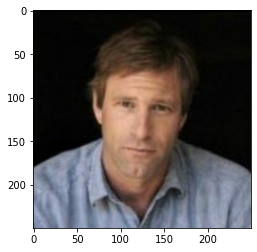

Hello Human!
Predicted breed:  Brittany


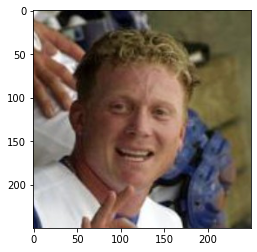

Invalid image
Hello Dog!
Predicted breed:  Affenpinscher


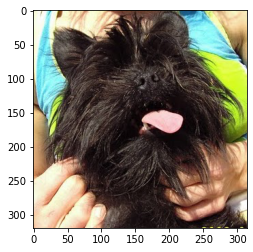

Hello Dog!
Predicted breed:  Affenpinscher


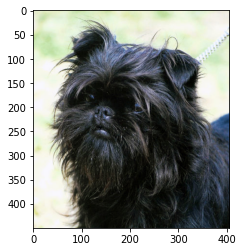

Hello Dog!
Predicted breed:  Brussels griffon


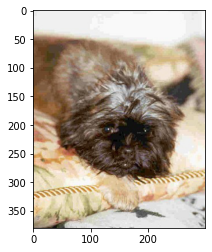

In [24]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for file in np.hstack((human_files[:3], dog_files[:3])):
    run_app(file)

### Refinement:
The CNN model I have created from scratch got the accuracy of 24%. Although it meets the benchmarking, the model can be significantly improved by using transfer learning. To create CNN with transfer learning, I have selected the Resnet101 architecture which is pre-trained on ImageNet dataset, the Resnet101 architecture have 101 layers deep. The last convolutional output of Resnet101 is fed as input to our model. We only need to add a fully connected layer to produce 133-dimensional output (one for each dog category). The model performed extremely well when compared to CNN from scratch. With just 20 epochs, the model got 84% accuracy.

<hr/>

### Justification:
I think the model performance is better than expected. The model created using transfer learning have an accuracy of 84% compared to the CNN model created from scratch which had only 24% accuracy.
